In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('housepricedata.csv')

In [9]:
df


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [10]:
dataset = df.values

In [11]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [12]:
X = dataset[:,0:10]

In [13]:
Y = dataset[:,10]

In [14]:
from sklearn import preprocessing

In [15]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [16]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [19]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [20]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [21]:
print(X_val.shape)

(219, 10)


In [22]:
from keras.models import Sequential
from keras.layers import Dense

In [23]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=200,
          validation_data=(X_val, Y_val))

Epoch 1/200
32/32 [==============================] - 2s 9ms/step - loss: 0.6936 - accuracy: 0.5088 - val_loss: 0.6969 - val_accuracy: 0.4521
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5078 - val_loss: 0.6920 - val_accuracy: 0.4521
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5088 - val_loss: 0.6879 - val_accuracy: 0.4566
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5450 - val_loss: 0.6843 - val_accuracy: 0.5525
Epoch 5/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.6634 - val_loss: 0.6810 - val_accuracy: 0.6804
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.7564 - val_loss: 0.6779 - val_accuracy: 0.7626
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6765 - accuracy: 0.7730 - val_loss: 0.6748 - val_accuracy: 0.8128
Epoch 8/200
3

Epoch 59/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8699 - val_loss: 0.3115 - val_accuracy: 0.9315
Epoch 60/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3498 - accuracy: 0.8699 - val_loss: 0.3076 - val_accuracy: 0.9269
Epoch 61/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3462 - accuracy: 0.8669 - val_loss: 0.2987 - val_accuracy: 0.9132
Epoch 62/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8718 - val_loss: 0.2958 - val_accuracy: 0.9178
Epoch 63/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8748 - val_loss: 0.2914 - val_accuracy: 0.9178
Epoch 64/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3373 - accuracy: 0.8718 - val_loss: 0.2898 - val_accuracy: 0.9315
Epoch 65/200
32/32 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8738 - val_loss: 0.2843 - val_accuracy: 0.9178
Epoch 

32/32 [==============================] - 0s 3ms/step - loss: 0.2736 - accuracy: 0.8845 - val_loss: 0.2043 - val_accuracy: 0.9224
Epoch 117/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2738 - accuracy: 0.8855 - val_loss: 0.2076 - val_accuracy: 0.9361
Epoch 118/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8875 - val_loss: 0.2046 - val_accuracy: 0.9269
Epoch 119/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2716 - accuracy: 0.8875 - val_loss: 0.2085 - val_accuracy: 0.9361
Epoch 120/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2719 - accuracy: 0.8875 - val_loss: 0.2084 - val_accuracy: 0.9361
Epoch 121/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2703 - accuracy: 0.8894 - val_loss: 0.2017 - val_accuracy: 0.9269
Epoch 122/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.8904 - val_loss: 0.2021 - val_accuracy: 0.9269
Epoch 123/200

32/32 [==============================] - 0s 3ms/step - loss: 0.2504 - accuracy: 0.8933 - val_loss: 0.1801 - val_accuracy: 0.9361
Epoch 174/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2507 - accuracy: 0.8933 - val_loss: 0.1788 - val_accuracy: 0.9361
Epoch 175/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.8933 - val_loss: 0.1902 - val_accuracy: 0.9406
Epoch 176/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2499 - accuracy: 0.8963 - val_loss: 0.1780 - val_accuracy: 0.9361
Epoch 177/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2488 - accuracy: 0.8924 - val_loss: 0.1834 - val_accuracy: 0.9406
Epoch 178/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2498 - accuracy: 0.8924 - val_loss: 0.1789 - val_accuracy: 0.9406
Epoch 179/200
32/32 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.8943 - val_loss: 0.1792 - val_accuracy: 0.9406
Epoch 180/200

In [26]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.3435 - accuracy: 0.8676


0.8675799369812012

In [27]:
import matplotlib.pyplot as plt
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                352       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,441
Trainable params: 1,441
Non-trainable params: 0
_________________________________________________________________


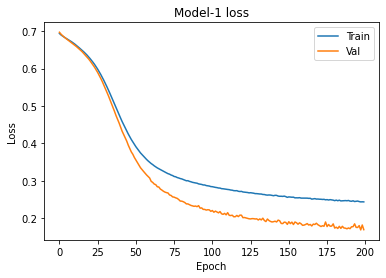

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model-1 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

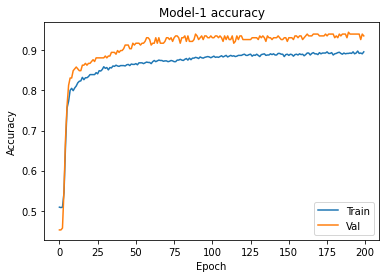

In [29]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model-1 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [30]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 2s 54ms/step - loss: 0.4727 - accuracy: 0.7730 - val_loss: 0.3774 - val_accuracy: 0.9087
Epoch 2/100
32/32 [==============================] - 1s 36ms/step - loss: 0.3550 - accuracy: 0.8434 - val_loss: 0.2778 - val_accuracy: 0.9087
Epoch 3/100
32/32 [==============================] - 1s 35ms/step - loss: 0.3150 - accuracy: 0.8777 - val_loss: 0.1865 - val_accuracy: 0.9406
Epoch 4/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2836 - accuracy: 0.8826 - val_loss: 0.2472 - val_accuracy: 0.9178
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.2647 - accuracy: 0.8845 - val_loss: 0.2084 - val_accuracy: 0.9041
Epoch 6/100
32/32 [==============================] - 1s 37ms/step - loss: 0.2762 - accuracy: 0.8914 - val_loss: 0.2514 - val_accuracy: 0.8995
Epoch 7/100
32/32 [==============================] - 1s 42ms/step - loss: 0.2580 - accuracy: 0.8963 - val_loss: 0.2187 - val_accuracy: 0.9178
Epoch 

32/32 [==============================] - 1s 47ms/step - loss: 0.1545 - accuracy: 0.9354 - val_loss: 0.1922 - val_accuracy: 0.9269
Epoch 59/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1752 - accuracy: 0.9247 - val_loss: 0.2397 - val_accuracy: 0.9224
Epoch 60/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1626 - accuracy: 0.9335 - val_loss: 0.3988 - val_accuracy: 0.8813
Epoch 61/100
32/32 [==============================] - 1s 45ms/step - loss: 0.1822 - accuracy: 0.9188 - val_loss: 0.1964 - val_accuracy: 0.9178
Epoch 62/100
32/32 [==============================] - 1s 39ms/step - loss: 0.1523 - accuracy: 0.9344 - val_loss: 0.2161 - val_accuracy: 0.9406
Epoch 63/100
32/32 [==============================] - 1s 38ms/step - loss: 0.1550 - accuracy: 0.9325 - val_loss: 0.2494 - val_accuracy: 0.9087
Epoch 64/100
32/32 [==============================] - 1s 43ms/step - loss: 0.1551 - accuracy: 0.9384 - val_loss: 0.2876 - val_accuracy: 0.9087
Epoch 65/100

In [31]:
model_2.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 16ms/step - loss: 0.7751 - accuracy: 0.8813


0.8812785148620605

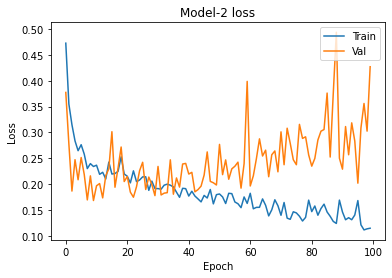

In [32]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model-2 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

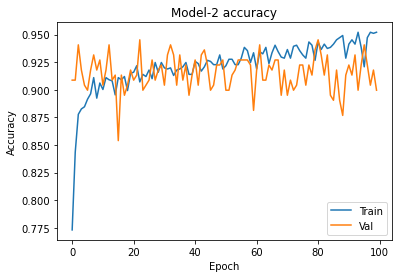

In [33]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model-2 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [34]:
from keras.layers import Dropout
from keras import regularizers

In [37]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.2),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [38]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 3s 55ms/step - loss: 14.2055 - accuracy: 0.6360 - val_loss: 3.8373 - val_accuracy: 0.8493
Epoch 2/100
32/32 [==============================] - 2s 49ms/step - loss: 1.6323 - accuracy: 0.8503 - val_loss: 0.5996 - val_accuracy: 0.9041
Epoch 3/100
32/32 [==============================] - 2s 61ms/step - loss: 0.5333 - accuracy: 0.8777 - val_loss: 0.4106 - val_accuracy: 0.9132
Epoch 4/100
32/32 [==============================] - 2s 56ms/step - loss: 0.4906 - accuracy: 0.8699 - val_loss: 0.4175 - val_accuracy: 0.9269
Epoch 5/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5032 - accuracy: 0.8571 - val_loss: 0.4429 - val_accuracy: 0.8950
Epoch 6/100
32/32 [==============================] - 2s 50ms/step - loss: 0.4634 - accuracy: 0.8728 - val_loss: 0.3853 - val_accuracy: 0.9361
Epoch 7/100
32/32 [==============================] - 2s 51ms/step - loss: 0.4710 - accuracy: 0.8679 - val_loss: 0.4189 - val_accuracy: 0.8858
Epoch

32/32 [==============================] - 2s 51ms/step - loss: 0.4197 - accuracy: 0.8836 - val_loss: 0.3347 - val_accuracy: 0.9269
Epoch 59/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4317 - accuracy: 0.8748 - val_loss: 0.3617 - val_accuracy: 0.9361
Epoch 60/100
32/32 [==============================] - 1s 46ms/step - loss: 0.4342 - accuracy: 0.8757 - val_loss: 0.3461 - val_accuracy: 0.9224
Epoch 61/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4357 - accuracy: 0.8777 - val_loss: 0.3610 - val_accuracy: 0.9406
Epoch 62/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4352 - accuracy: 0.8777 - val_loss: 0.3533 - val_accuracy: 0.9269
Epoch 63/100
32/32 [==============================] - 1s 47ms/step - loss: 0.4200 - accuracy: 0.8796 - val_loss: 0.3348 - val_accuracy: 0.9224
Epoch 64/100
32/32 [==============================] - 2s 47ms/step - loss: 0.4203 - accuracy: 0.8777 - val_loss: 0.3553 - val_accuracy: 0.9452
Epoch 65/100

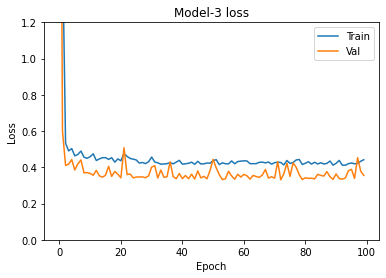

In [39]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model-3 loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

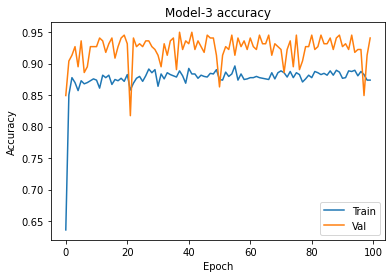

In [40]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model-3 accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [41]:
model_3.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 12ms/step - loss: 0.4869 - accuracy: 0.8493


0.8493150472640991